In [56]:
import numpy as np 
import mplcatppuccin
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("latte")

$$
p_{d} = \frac{(n - 1/n)^{2} \operatorname{sin}^{2}(\theta)}{2 + 2 n^{2} - (n + 1/n)^{2} \operatorname{sin}^{2}(\theta) + 4 \operatorname{cos} \theta \sqrt{n^{2} - \operatorname{sin}^{2} \theta}}
$$

In [57]:
def deffuse_polarization_degree(theta: np.ndarray, n: float = 1.7) -> np.ndarray:
    """Зависимость степени поляризации от угла отражения

    Args:
        theta (np.ndarray): Угол отражения
        n (float, optional): Показатель преломления. Defaults to 1.7.

    Returns:
        np.ndarray: Степень поляризации
    """
    numerator = np.power(n - 1 / n, 2) * np.power(np.sin(theta), 2)
    denominator = 2 + 2 * np.power(n, 2) - np.power(n + 1 / n, 2) * np.power(np.sin(theta), 2) + 4 * np.cos(theta) * np.sqrt(np.power(n, 2) - np.power(np.sin(theta), 2))
    return numerator / denominator
def polarization_degree_to_reflection_angle(dolp: np.ndarray, n: float = 1.7) -> np.ndarray:
    """Функция, обратная к `diffuse_polarization_degree`. Рассчет угла отражения по степени поляризации.

    Args:
        dolp (np.ndarray): Степень поляризации
        n (float, optional): Показатель преломления. Defaults to 1.7.

    Returns:
        np.ndarray: Угол отражения
    """
    temp = np.sqrt((2 * dolp + 2 * n**2 * dolp - 2 * n**2 + n**4 + dolp**2 + 4 * n**2 * dolp**2 - n**4 * dolp**2 - 4 * n**3 * dolp * np.sqrt(-(dolp - 1) * (dolp + 1))) + 1) / np.sqrt(n**4 * dolp**2 + 2 * n**4 * dolp + n**4 + 6 * n**2 * dolp**2 + 4 * n**2 * dolp - 2 * n**2 + dolp**2 + 2 * dolp + 1)
    temp = np.minimum(np.real(temp), 1)
    theta_val = np.arccos(temp)
    return theta_val

<Figure size 1000x1000 with 0 Axes>

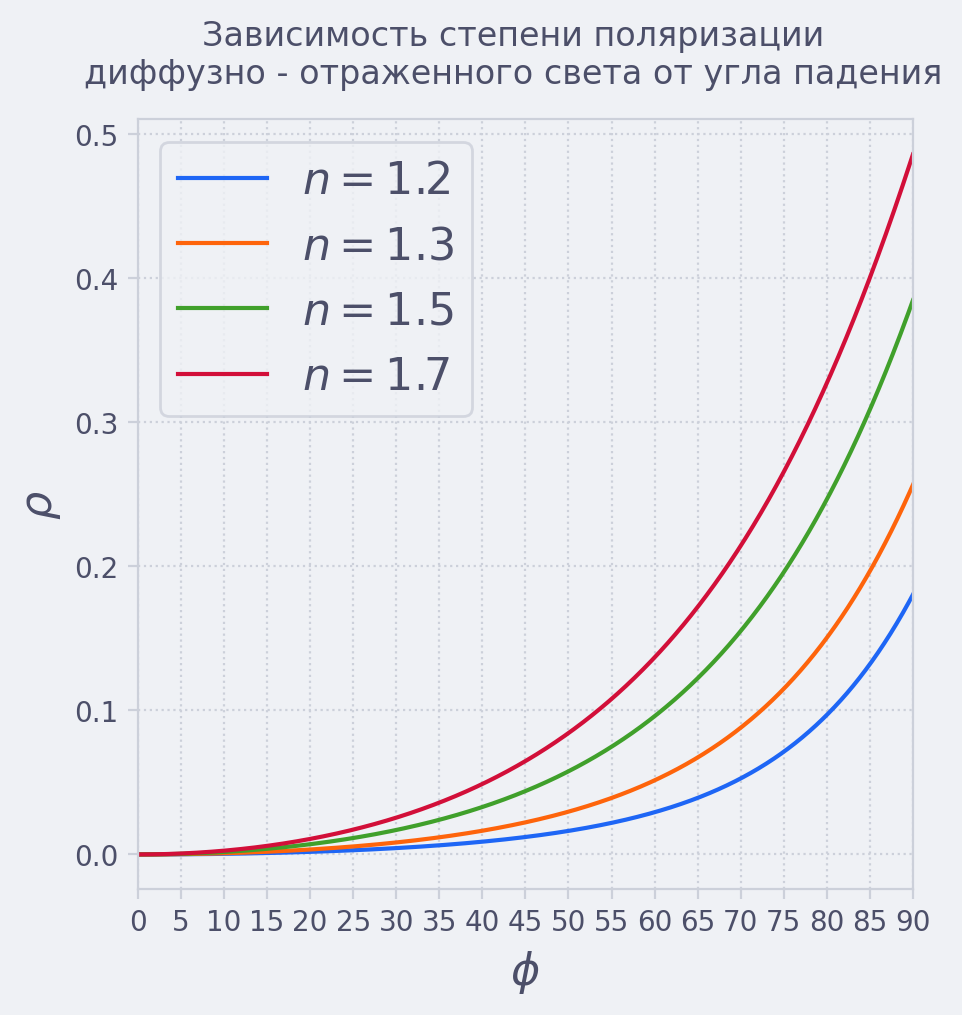

In [64]:
plt.figure(figsize = (5, 5), dpi = 200)

theta_val = np.linspace(0, np.pi / 2, 1000)
dolp = np.linspace(0, 0.5, 1000)

n_values = [1.2, 1.3, 1.5, 1.7,]

fig, ax = plt.subplots(figsize = (5, 5), dpi = 200)
for n in n_values:
    ax.plot(theta_val * 180 / np.pi, deffuse_polarization_degree(theta_val, n = n), label = f'$n = {n}$')
    ax.grid(ls = ':')
    ax.set_xticks(np.arange(0, 100, 5))
    ax.set_xlabel(r"$\phi$", fontsize = 16)
    ax.set_ylabel(r"$\rho$", fontsize = 16)
    ax.set_xlim(0, 90)

fig.suptitle("Зависимость степени поляризации\nдиффузно - отраженного света от угла падения", fontsize = 12)
plt.legend(fontsize = 16)

### Обычное отражение 

$\begin{aligned} & r_{\perp} \equiv \frac{R_{\perp}}{\mathscr{E}_{\perp}}=\frac{n_1 \cos \varphi-n_2 \cos \psi}{n_1 \cos \varphi+n_2 \cos \psi}, \quad d_{\perp} \equiv \frac{D_1}{\mathscr{E}_{\perp}}=\frac{2 n_1 \cos \varphi}{n_1 \cos \varphi+n_4 \cos \psi} \\ & r_{\| 1} \equiv \frac{R_{\| \mid}}{\mathscr{E}_{\|}}=\frac{n_2 \cos \varphi-n_1 \cos \psi}{n_{22} \cos \varphi+n_1 \cos \psi}, \quad d_{\|} \equiv \frac{D_{||}}{\mathscr{E}_{\| 1}}=\frac{2 n_1 \cos \varphi}{n_2 \cos \varphi+n_1 \cos \psi}\end{aligned}$

In [34]:
def r_perp(phi, n = 1.5):
    psi = np.arcsin(np.sin(phi) / n)
    return (np.cos(phi) - n * np.cos(psi)) / (np.cos(phi) + n * np.cos(psi))
def r_parr(phi, n = 1.5):
    psi = np.arcsin(np.sin(phi) / n)
    return (n * np.cos(phi) - np.cos(psi)) / (n * np.cos(phi) + np.cos(psi))
def d_perp(phi, n = 1.5):
    psi = np.arcsin(np.sin(phi) / n)
    return 2 * np.cos(phi) / (np.cos(phi) + n * np.cos(psi))
def d_parr(phi, n = 1.5):
    psi = np.arcsin(np.sin(phi) / n)
    return 2 * np.cos(phi) / (n * np.cos(phi) + np.cos(psi))

(-0.01, 1.01)

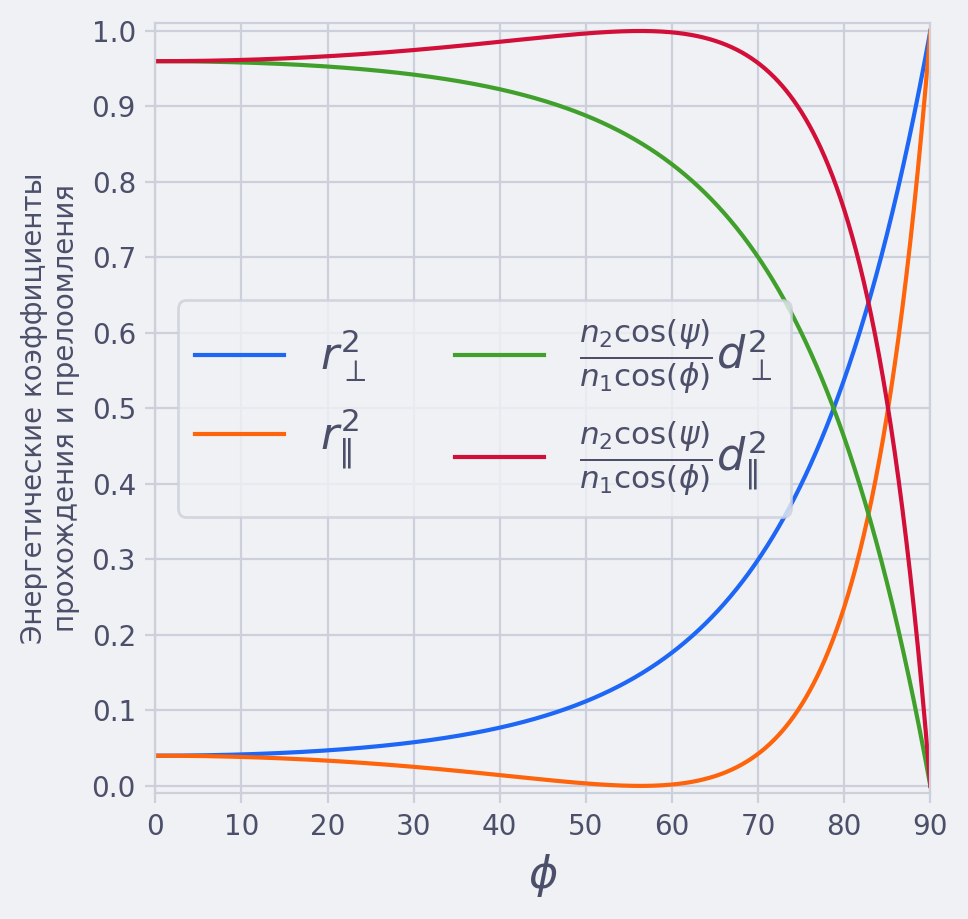

In [43]:
plt.figure(figsize = (5, 5), dpi = 200)
phi = np.linspace(0, np.pi/2, 1000)
n = 1.5
T_perp = n * np.cos(np.arcsin(np.sin(phi) / n)) * np.power(d_perp(phi, n = n), 2) / np.cos(phi) 
T_parr = n * np.cos(np.arcsin(np.sin(phi) / n)) * np.power(d_parr(phi, n = n), 2) / np.cos(phi) 
plt.plot(phi * 180 / np.pi, np.power(r_perp(phi), 2), label = '$r_{\perp}^{2}$')
plt.plot(phi * 180 / np.pi, np.power(r_parr(phi), 2), label = '$r_{\|}^{2}$')
plt.plot(phi * 180 / np.pi, T_perp, label = r'$\frac{n_{2} \operatorname{cos}(\psi)}{n_1 \operatorname{cos} (\phi)}  d_{\perp}^{2}$')
plt.plot(phi * 180 / np.pi, T_parr, label = r'$\frac{n_{2} \operatorname{cos}(\psi)}{n_1 \operatorname{cos} (\phi)} d_{\|}^{2}$')
plt.legend(fontsize = 16, ncols = 2)
plt.xlabel('$\phi$', fontsize = 16)
plt.xticks(np.arange(0, 190, 10))
plt.xlim(0, 90)
plt.ylabel("Энергетические коэффициенты\nпрохождения и прелоомления", fontsize = 10)
plt.grid()
plt.yticks(np.arange(0, 1.2, 0.1))
plt.ylim(-0.01, 1.01)

In [46]:
def deg_of_pol(phi, n = 1.5):
    return np.abs((np.power(r_parr(phi, n), 2) - np.power(r_perp(phi, n), 2)) / (np.power(r_parr(phi, n), 2) + np.power(r_perp(phi, n), 2)))

Text(0.5, 1.0, 'Зависимость степени поляризации зеркально\nотраженного света от угла падения')

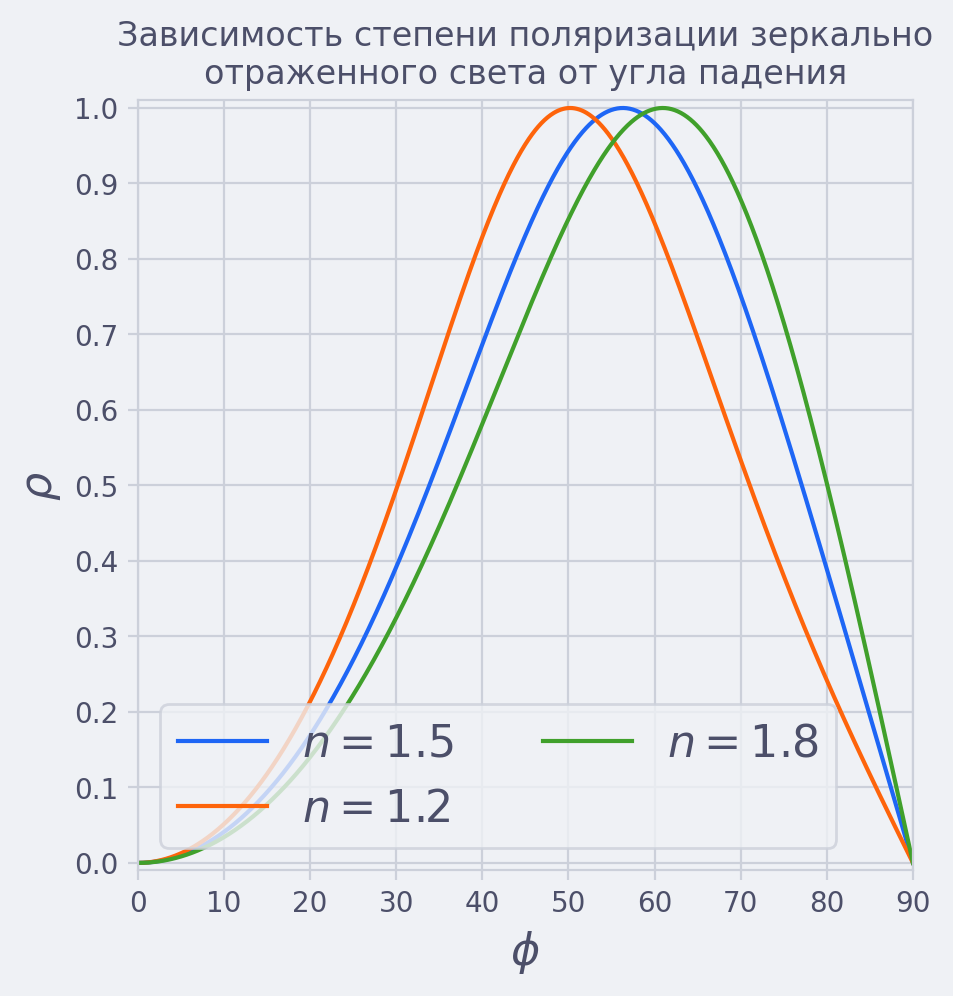

In [55]:
plt.figure(figsize = (5, 5), dpi = 200)
plt.plot(phi * 180 / np.pi, deg_of_pol(phi), label = '$n = 1.5$')
plt.plot(phi * 180 / np.pi, deg_of_pol(phi, n = 1.2), label = '$n = 1.2$')
plt.plot(phi * 180 / np.pi, deg_of_pol(phi, n = 1.8), label = '$n = 1.8$')
plt.legend(fontsize = 16, ncols = 2, loc = 'lower left')
plt.xlabel('$\phi$', fontsize = 16)
plt.xticks(np.arange(0, 190, 10))
plt.xlim(0, 90)
plt.grid()
plt.yticks(np.arange(0, 1.2, 0.1))
plt.ylim(-0.01, 1.01)
plt.ylabel(r'$\rho$', fontsize = 16)
plt.title("Зависимость степени поляризации зеркально\nотраженного света от угла падения", fontsize = 12)